In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images / 255.0
test_images = test_images / 255.0
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)


11490434/11490434 [==============================] - 5s 0us/step


In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [5]:
model.fit(train_images, train_labels, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.2743 - accuracy: 0.9230 - val_loss: 0.1336 - val_accuracy: 0.9628
Epoch 2/5
1688/1688 [==============================] - 11s 6ms/step - loss: 0.1223 - accuracy: 0.9633 - val_loss: 0.1022 - val_accuracy: 0.9683
Epoch 3/5
1688/1688 [==============================] - 11s 7ms/step - loss: 0.0847 - accuracy: 0.9747 - val_loss: 0.0857 - val_accuracy: 0.9733
Epoch 4/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0629 - accuracy: 0.9808 - val_loss: 0.0712 - val_accuracy: 0.9798
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0480 - accuracy: 0.9848 - val_loss: 0.0699 - val_accuracy: 0.9805


In [6]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0761 - accuracy: 0.9780
Test accuracy: 0.9779999852180481


In [7]:
predictions = model.predict(test_images[:10])
predicted_labels = np.argmax(predictions, axis=1)


1/1 [==============================] - 0s 253ms/step


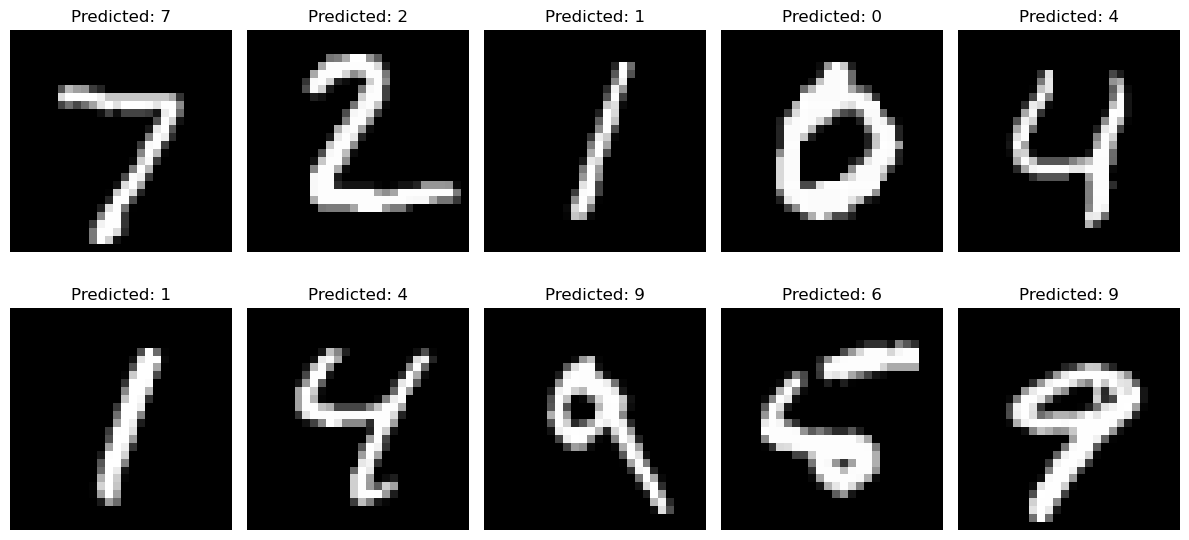

In [8]:
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()